In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel('shots_creation.xlsx', header=1)

In [49]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,...,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,22-009,2000,19.0,23,1.21,...,0,4,0.21,4,0,0,0,0,0,Matches
1,2,Che Adams,sct SCO,FW,Southampton,25-184,1996,9.9,20,2.01,...,1,2,0.20,1,0,0,0,0,1,Matches
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-221,2001,8.0,15,1.88,...,1,1,0.13,0,1,0,0,0,0,Matches
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-271,1998,7.3,7,0.96,...,0,0,0.00,0,0,0,0,0,0,Matches
4,5,Nathan Aké,nl NED,DF,Manchester City,26-329,1995,6.5,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,479,Wilfried Zaha,ci CIV,FW,Crystal Palace,29-064,1992,15.5,51,3.30,...,0,6,0.39,5,0,1,0,0,0,Matches
479,480,Oleksandr Zinchenko,ua UKR,DF,Manchester City,25-029,1996,5.6,16,2.84,...,0,3,0.53,3,0,0,0,0,0,Matches
480,481,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,28-300,1993,6.1,30,4.91,...,1,4,0.65,3,0,1,0,0,0,Matches
481,482,Kurt Zouma,fr FRA,DF,West Ham,27-078,1994,10.8,2,0.19,...,0,0,0.00,0,0,0,0,0,0,Matches


In [50]:
df = df[['Rk', 'Player', 'Pos', 'Squad', '90s', 'SCA', 'SCA90', 'GCA','GCA90']]

In [51]:
df = df[df['90s']>10]

In [52]:
df.sort_values('GCA90',ascending=False)

,Rk,Player,Pos,Squad,90s,SCA,SCA90,GCA,GCA90
377,378,Mohamed Salah,FW,Liverpool,19.8,81,4.09,19,0.96
258,259,James Maddison,"MF,FW",Leicester City,12.9,44,3.41,11,0.85
46,47,Jarrod Bowen,FW,West Ham,19.6,66,3.37,16,0.82
200,201,Gabriel Jesus,FW,Manchester City,14.3,46,3.21,11,0.77
7,8,Trent Alexander-Arnold,DF,Liverpool,17.7,90,5.08,12,0.68
...,...,...,...,...,...,...,...,...,...
73,74,Conor Coady,DF,Wolves,19.0,4,0.21,0,0.00
150,151,David de Gea,GK,Manchester Utd,19.0,3,0.16,0,0.00
68,69,Andreas Christensen,DF,Chelsea,11.1,4,0.36,0,0.00
245,246,Hugo Lloris,GK,Tottenham,18.0,4,0.22,0,0.00


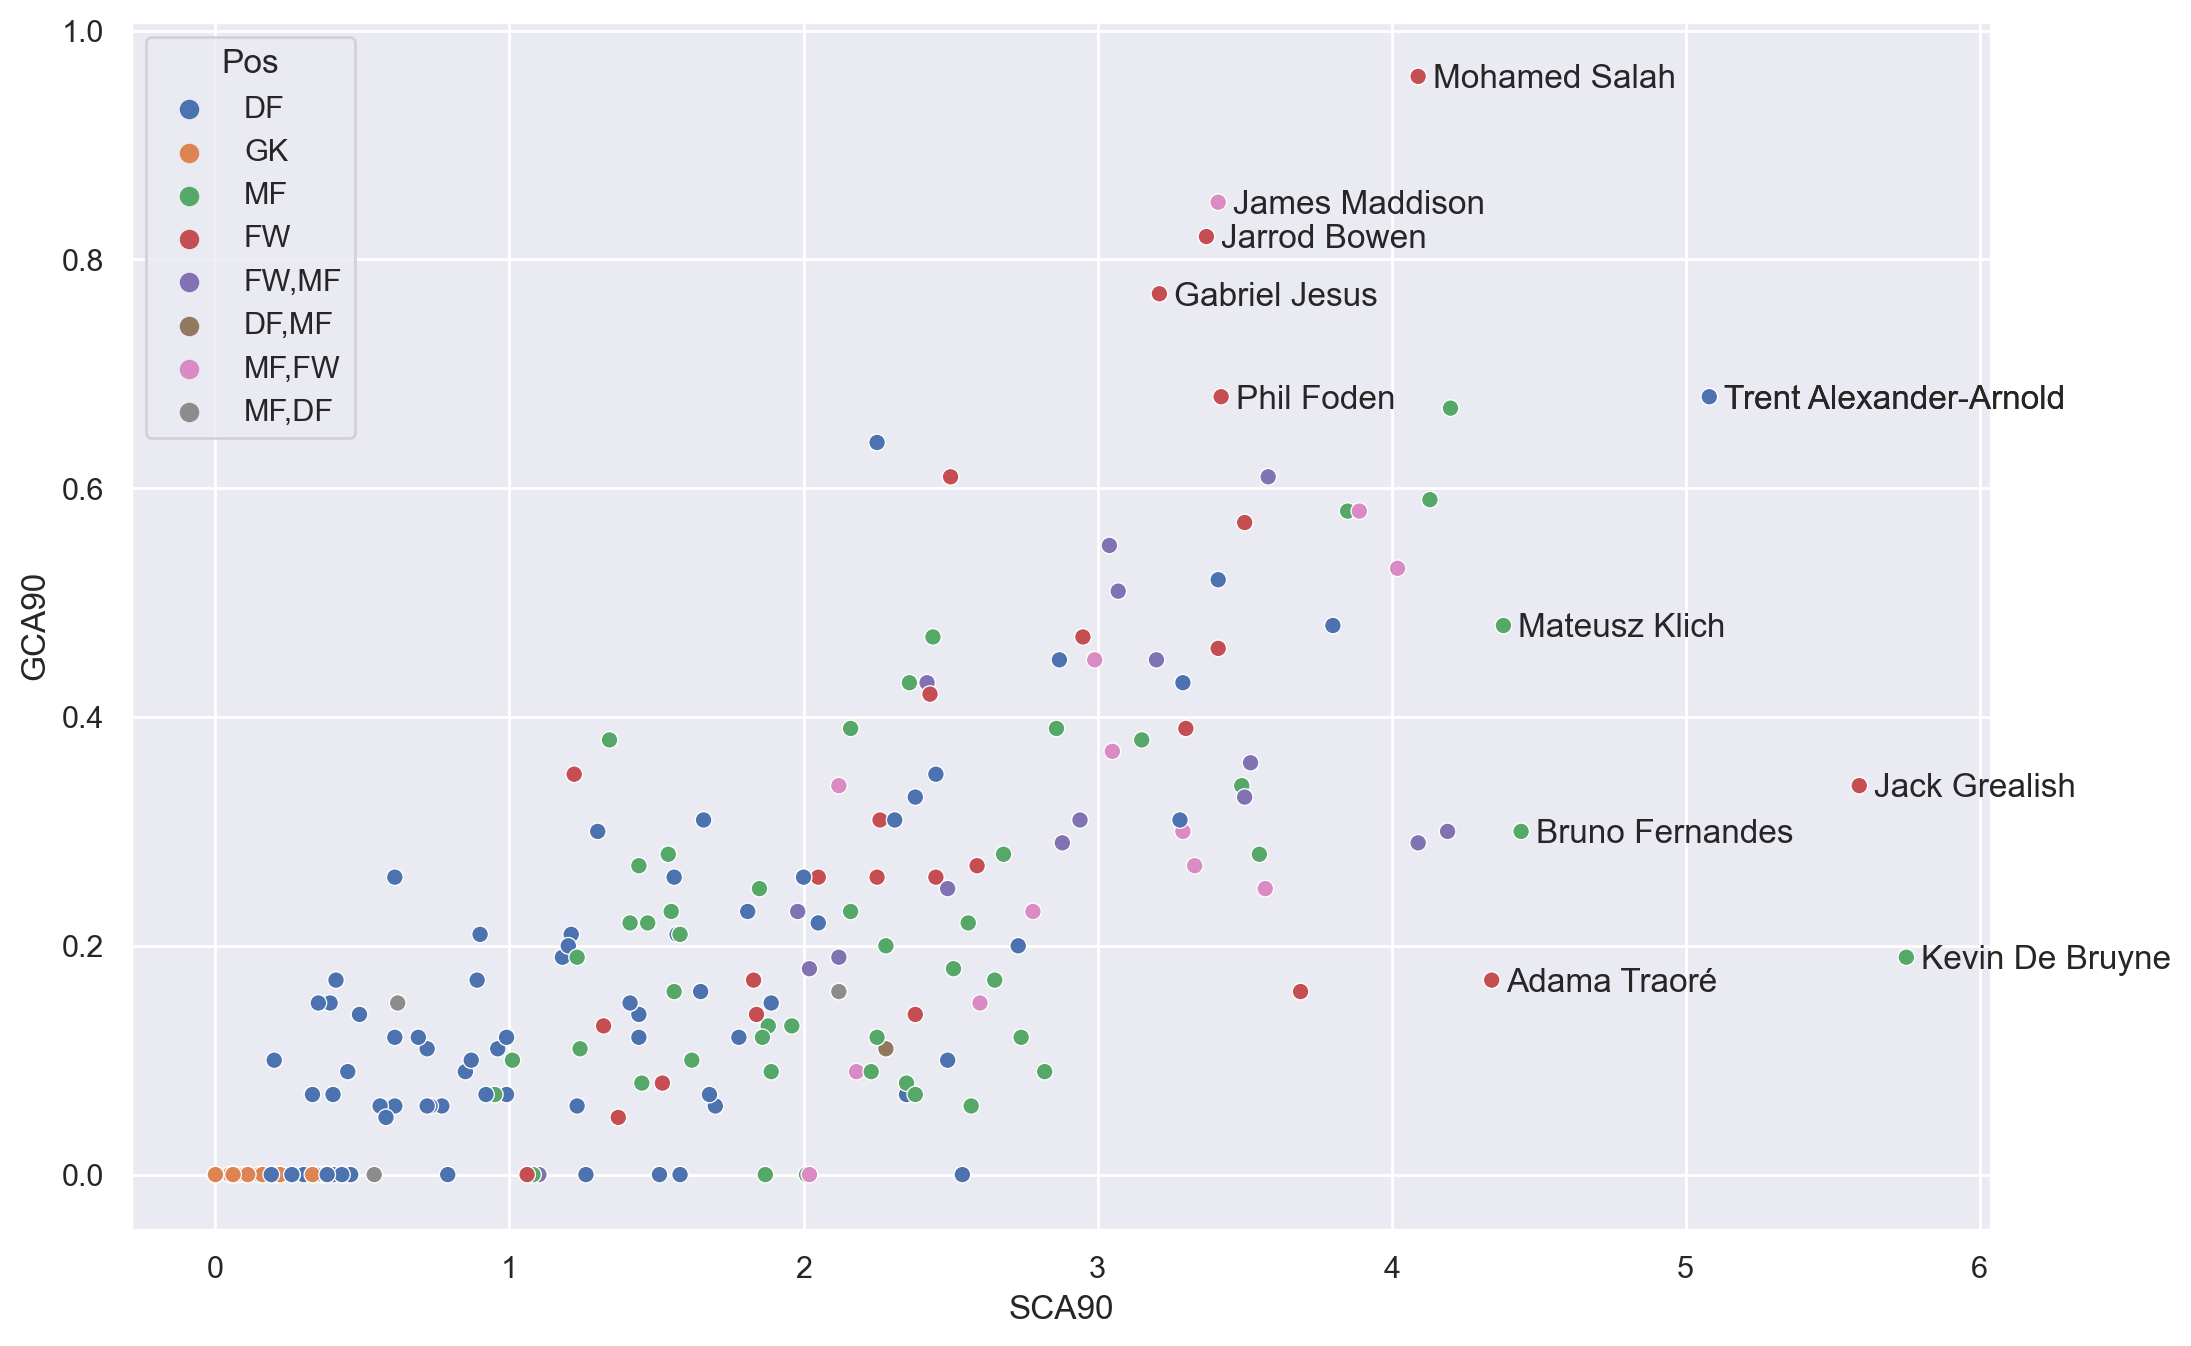

In [91]:
fig = plt.figure(figsize=(12,8), dpi=200)

sns.set_theme()
ax = sns.scatterplot(data=df, x='SCA90',y='GCA90', hue='Pos')
# fig.legend(loc='upper left', title='Position')
sns.move_legend(ax, loc='upper left')

top_players = [x for x in df.sort_values('SCA90', ascending=False)['Player'].head(6)]
top_players = top_players + [x for x in df.sort_values('GCA90', ascending=False)['Player'].head(6)]
for player in top_players:
    plt.text(x=df['SCA90'][df['Player']==player]+0.05, 
             y=df['GCA90'][df['Player']==player]-0.01,
             s=player)
fig.savefig('shots_creation.png')